## import libs - Copyleft : soroush yasini

In [1]:
import seaborn as sns
import pandas as pd
import json
import numpy as np
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import random
import pyproj
import warnings
import math
import csv
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from pyproj import Proj, transform
# Ignore all warnings
warnings.filterwarnings("ignore")
import os
import openpyxl
from simpledbf import Dbf5

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


### define path of shapes ( User SHOULD Provide The pathes HERE ! )

In [2]:
dist_shape = "T6/T6.shp"
offices = "offices/offices.shp"
access_db= "d10.csv"
access_df = pd.read_csv(access_db, delimiter = ',')
access_df

,district,bill_ID,agent_x,agent_y,counter_x,counter_y
0,10,8719726204229,540200.0,3938557.0,540196.0,3938583.0
1,10,8048617804222,540200.0,3938557.0,NaN,NaN
2,10,8508604404226,540227.0,3938690.0,NaN,NaN
3,10,8565168304222,540172.0,3938647.0,NaN,NaN
4,10,8073741604228,540190.0,3938672.0,540395.0,3938745.0
...,...,...,...,...,...,...
4796812,10,8384664304220,537422.0,3940698.0,NaN,NaN
4796813,10,8222857204222,537406.0,3940700.0,NaN,NaN
4796814,10,8216729104223,537324.0,3940645.0,NaN,NaN
4796815,10,8633466304222,537389.0,3940636.0,NaN,NaN


In [3]:
# # Define the prefix you want to search for
# prefix = 'R'

# # Get a list of all variables in the current Jupyter session
# all_variables = %who_ls

# # Filter variables that start with the specified prefix
# filtered_variables = [var for var in all_variables if var.startswith(prefix)]

# # Print the filtered variables and their values
# for var in filtered_variables:
#     print(f"{var}: {globals()[var]}")


## I - preprocessing the data 

In [4]:
# access_column_name = ['bill_ID','agent_x', 'agent_y', 'counter_x', 'counter_y']
# access_df = pd.read_csv('access_table.txt', delimiter = ',', names=access_column_name)
# access_df
access_df = pd.read_csv(access_db, delimiter = ',')
access_df = access_df.drop(columns=['district'])
access_df

,bill_ID,agent_x,agent_y,counter_x,counter_y
0,8719726204229,540200.0,3938557.0,540196.0,3938583.0
1,8048617804222,540200.0,3938557.0,NaN,NaN
2,8508604404226,540227.0,3938690.0,NaN,NaN
3,8565168304222,540172.0,3938647.0,NaN,NaN
4,8073741604228,540190.0,3938672.0,540395.0,3938745.0
...,...,...,...,...,...
4796812,8384664304220,537422.0,3940698.0,NaN,NaN
4796813,8222857204222,537406.0,3940700.0,NaN,NaN
4796814,8216729104223,537324.0,3940645.0,NaN,NaN
4796815,8633466304222,537389.0,3940636.0,NaN,NaN


#### extract table dimention for further reporting 

In [5]:
R_access_rows = (access_df.shape[0]) -1 
R_access_ID_unique = len(access_df['bill_ID'].unique())
# Display the number of rows
print("Number of records:", R_access_rows)
print("Number of unique IDs:", R_access_ID_unique)

Number of records: 4796816
Number of unique IDs: 213250


### - data pre-filtering by previous phase 


In [6]:
dbscan_df = gpd.read_file('دقت_قطعه_ای.dbf')[["BILL_IDENT"]]
dbscan_df

,BILL_IDENT
0,8652218704227
1,8204364904227
2,8117281104229
3,8173310104222
4,8117332004224
...,...
179856,8697378904226
179857,8442168904225
179858,8420203204220
179859,8631245304225


In [7]:
# dbscan_df2 = pd.read_excel('dbscan.xlsx')
# dbscan_df2

In [8]:
R_dbscan_rows_uniqueID = (dbscan_df.shape[0])
print("Number of records and Unique IDs:", R_dbscan_rows_uniqueID)

Number of records and Unique IDs: 179861


In [9]:
access_ID_unique = access_df['bill_ID'].unique()
bill_ident_value = dbscan_df['BILL_IDENT'].unique()
bill_ident_value = bill_ident_value.astype(np.int64)

In [10]:
print(bill_ident_value)

# [8652218704227 8204364904227 8117281104229 ... 8420203204220 8631245304225
#  8669946504226]



[8652218704227 8204364904227 8117281104229 ... 8420203204220 8631245304225
 8669946504226]


In [11]:
flt_by_dbscan_df =access_df[~access_df['bill_ID'].isin(bill_ident_value)]
#access_bill_id_filterd_value = filter_access_df['bill_ID'].unique()
flt_by_dbscan_df.reset_index(drop=True, inplace=True)
flt_by_dbscan_df

,bill_ID,agent_x,agent_y,counter_x,counter_y
0,8478328104225,540109.0,3938321.0,NaN,NaN
1,8478327904228,540109.0,3938321.0,NaN,NaN
2,8478326804220,540109.0,3938321.0,NaN,NaN
3,8553996304220,540109.0,3938321.0,NaN,NaN
4,8478330804226,540109.0,3938321.0,NaN,NaN
...,...,...,...,...,...
675447,8498452004221,540186.0,3941182.0,NaN,NaN
675448,8498451604225,540186.0,3941182.0,NaN,NaN
675449,8104784104221,540195.0,3941181.0,NaN,NaN
675450,8633466304222,537389.0,3940636.0,NaN,NaN


In [12]:
flt_by_dbscan_df.replace(0, np.nan, inplace=True)
flt_by_dbscan_df.to_csv('filtered_by_dbscan_zer2null.csv', index=False)


In [13]:
flt_by_dbscan_df

,bill_ID,agent_x,agent_y,counter_x,counter_y
0,8478328104225,540109.0,3938321.0,NaN,NaN
1,8478327904228,540109.0,3938321.0,NaN,NaN
2,8478326804220,540109.0,3938321.0,NaN,NaN
3,8553996304220,540109.0,3938321.0,NaN,NaN
4,8478330804226,540109.0,3938321.0,NaN,NaN
...,...,...,...,...,...
675447,8498452004221,540186.0,3941182.0,NaN,NaN
675448,8498451604225,540186.0,3941182.0,NaN,NaN
675449,8104784104221,540195.0,3941181.0,NaN,NaN
675450,8633466304222,537389.0,3940636.0,NaN,NaN


In [17]:
R_flt_by_dbscan_rows = flt_by_dbscan_df.shape[0]
R_flt_by_dbscan_ID_unique = len(flt_by_dbscan_df['bill_ID'].unique())
print("Number of records:", R_flt_by_dbscan_rows)
print("Number of unique IDs:", R_flt_by_dbscan_ID_unique)

Number of records: 675452
Number of unique IDs: 34411


### - adjust inverted counter coordinates


#### check a random sample of counters before adjustment : 

In [18]:
import pandas as pd
import geopandas as gpd
import pyproj
import folium
from folium.plugins import MarkerCluster
import numpy as np
shapefile_path = dist_shape
# Read the filtered CSV data
data = pd.read_csv('filtered_by_dbscan_zer2null.csv')
df = data.drop_duplicates(subset='bill_ID')
# Filter out rows with NaNs in 'counter_x' and 'counter_y' columns
df = df.dropna(subset=['counter_x', 'counter_y'])
# Convert UTM coordinates to latitude and longitude
utm_proj = pyproj.Proj(proj='utm', zone=39, ellps='WGS84')
lonlat_proj = pyproj.Proj(proj='latlong', datum='WGS84')
df['lon'], df['lat'] = pyproj.transform(utm_proj, lonlat_proj, df['counter_x'].values, df['counter_y'].values)
# Filter out rows with NaNs in 'lon' and 'lat' columns after conversion
df = df.dropna(subset=['lon', 'lat'])
# Sample a subset of the data if needed
sampled_data = df #.sample(n=20000)  # Adjust the number of samples as needed
# Read the boundary shapefile
boundary_shapefile = gpd.read_file(shapefile_path)  # Update the path as needed
# Create a Folium map centered at the mean of all points
m = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['lon'].mean()], zoom_start=3.5)
# Plot the boundary shapefile
folium.GeoJson(boundary_shapefile).add_to(m)
# Create a MarkerCluster layer for the sampled data points
marker_cluster = MarkerCluster().add_to(m)
# Add markers for each point in the sampled data
for idx, row in sampled_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']]).add_to(marker_cluster)
# Display the map
#m



#### invert order of counter coordinates as needed :

In [19]:
# Define the mask to identify rows where counter_x and counter_y might be reversed
# Typically, UTM x-coordinates are between 100,000 and 900,000 (for zone-specific cases)
# y-coordinates range between 0 and 10,000,000
df = pd.read_csv('filtered_by_dbscan_zer2null.csv')
non_nan_df = df.dropna(subset=['counter_x', 'counter_y'])
mask = (df['counter_x'] > 900000) & (df['counter_y'] < 1000000)

# Count the number of rows with inverted coordinates
#R_counters_inverted = mask.sum()

# Swap the counter_x and counter_y values where the mask is True
df.loc[mask, ['counter_x', 'counter_y']] = df.loc[mask, ['counter_y', 'counter_x']].values

# Display the count of corrected rows
#print(f'Number of rows with inverted coordinates: {R_counters_inverted}')

# Optionally, save the corrected DataFrame back to a CSV file
df.to_csv('filtered_by_dbscan_zer2null_counterFixed.csv', index=False)
# save the only rows that has been correceted
corrected_rows = df[mask]
corrected_rows.to_csv('Jst_fixed_counter_data.csv', index=False)
#corrected_rows
df


,bill_ID,agent_x,agent_y,counter_x,counter_y
0,8478328104225,540109.0,3938321.0,NaN,NaN
1,8478327904228,540109.0,3938321.0,NaN,NaN
2,8478326804220,540109.0,3938321.0,NaN,NaN
3,8553996304220,540109.0,3938321.0,NaN,NaN
4,8478330804226,540109.0,3938321.0,NaN,NaN
...,...,...,...,...,...
675447,8498452004221,540186.0,3941182.0,NaN,NaN
675448,8498451604225,540186.0,3941182.0,NaN,NaN
675449,8104784104221,540195.0,3941181.0,NaN,NaN
675450,8633466304222,537389.0,3940636.0,NaN,NaN


In [20]:
non_nan_df = df.dropna(subset=['counter_x', 'counter_y'])

In [21]:
R_counters = non_nan_df.shape[0]
R_counters_ID_unique = len(non_nan_df['bill_ID'].unique())
print('| counter records :', R_counters, '| Unique counters : ', R_counters_ID_unique, '|')

| counter records : 157243 | Unique counters :  11138 |


In [22]:
R_counters_inverted = corrected_rows.shape[0]
R_counters_inverted_ID_unique = len(corrected_rows['bill_ID'].unique())
print('| counter records inverted :', R_counters_inverted, '| Unique counters inverted : ', R_counters_inverted_ID_unique, '|')

| counter records inverted : 60241 | Unique counters inverted :  7066 |


In [48]:
##### need to ad unique inverted counters ?

#### map of data with fixed counters 

In [23]:
import pandas as pd
import geopandas as gpd
import pyproj
import folium
from folium.plugins import MarkerCluster
import numpy as np
shapefile_path = dist_shape
# Read the filtered CSV data
data = pd.read_csv('filtered_by_dbscan_zer2null_counterFixed.csv')
df = data.drop_duplicates(subset='bill_ID')

# Filter out rows with NaNs in 'counter_x' and 'counter_y' columns
df = df.dropna(subset=['counter_x', 'counter_y'])

# Convert UTM coordinates to latitude and longitude
utm_proj = pyproj.Proj(proj='utm', zone=39, ellps='WGS84')
lonlat_proj = pyproj.Proj(proj='latlong', datum='WGS84')
df['lon'], df['lat'] = pyproj.transform(utm_proj, lonlat_proj, df['counter_x'].values, df['counter_y'].values)

# Filter out rows with NaNs in 'lon' and 'lat' columns after conversion
df = df.dropna(subset=['lon', 'lat'])

# Sample a subset of the data if needed
sampled_data = df #.sample(n=20000)  # Adjust the number of samples as needed

# Read the boundary shapefile
boundary_shapefile = gpd.read_file(shapefile_path)  # Update the path as needed

# Create a Folium map centered at the mean of all points
m_fixed_counters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['lon'].mean()], zoom_start=3.5)

# Plot the boundary shapefile
folium.GeoJson(boundary_shapefile).add_to(m_fixed_counters)

# Create a MarkerCluster layer for the sampled data points
marker_cluster = MarkerCluster().add_to(m_fixed_counters)

# Add markers for each point in the sampled data
for idx, row in sampled_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']]).add_to(marker_cluster)

# Display the map




In [24]:
#m_fixed_counters

#### remove counters with outlayer coordinates :

In [25]:
# Load the CSV file
df = pd.read_csv('filtered_by_dbscan_zer2null_counterFixed.csv')

# Load the shapefile as a GeoDataFrame
shapefile_path = dist_shape # Update this path
gdf_shape = gpd.read_file(shapefile_path)

# Convert the counter_x and counter_y columns to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['counter_x'], df['counter_y'])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry)

# Ensure the CRS (Coordinate Reference System) matches
gdf_shape = gdf_shape.to_crs(epsg=32639)  # Ensure the shapefile is in UTM zone 39N
gdf_points = gdf_points.set_crs(epsg=32639)  # Ensure the points are in UTM zone 39N

# Check if points are within the shapefile boundaries
within_shape = gdf_points.within(gdf_shape.unary_union)

# Create a mask for rows that were originally non-NaN but are now NaN
originally_non_nan = df[['counter_x', 'counter_y']].notna().all(axis=1)
new_nan_replacement = ~within_shape & originally_non_nan

# Replace coordinates with NaN if they are outside the shapefile boundaries
df.loc[new_nan_replacement, ['counter_x', 'counter_y']] = np.nan

# Create a DataFrame with only the rows where counter_x and counter_y are newly NaN
df_new_nan_replaced = df.loc[new_nan_replacement]

# Save the DataFrame with newly NaN replaced rows to a new CSV file
df_new_nan_replaced.to_csv('nan_replaced_rows.csv', index=False)

# Calculate the number of newly replaced NaN values
R_outside_counters = new_nan_replacement.sum()

# Display the number of newly replaced NaN values
print(f"Number of newly replaced NaN values: {R_outside_counters}")

# Display the updated DataFrame and the DataFrame with newly NaN replaced rows
print(df)
print(df_new_nan_replaced)


Number of newly replaced NaN values: 11183
              bill_ID   agent_x    agent_y  counter_x  counter_y
0       8478328104225  540109.0  3938321.0        NaN        NaN
1       8478327904228  540109.0  3938321.0        NaN        NaN
2       8478326804220  540109.0  3938321.0        NaN        NaN
3       8553996304220  540109.0  3938321.0        NaN        NaN
4       8478330804226  540109.0  3938321.0        NaN        NaN
...               ...       ...        ...        ...        ...
675447  8498452004221  540186.0  3941182.0        NaN        NaN
675448  8498451604225  540186.0  3941182.0        NaN        NaN
675449  8104784104221  540195.0  3941181.0        NaN        NaN
675450  8633466304222  537389.0  3940636.0        NaN        NaN
675451  8222851704223  537386.0  3940685.0        NaN        NaN

[675452 rows x 5 columns]
              bill_ID   agent_x    agent_y  counter_x  counter_y
13      8674320804221       NaN        NaN        NaN        NaN
27      800135360422

In [26]:
df.to_csv('filtrd_goodCounters.csv', index=False)

In [27]:
R_counters_outlayer = df_new_nan_replaced.shape[0]
R_counters_outlayer_ID_unique = len(df_new_nan_replaced['bill_ID'].unique())
print('| counter records outlayer :', R_counters_outlayer, '| Unique counters outlayer : ', R_counters_outlayer_ID_unique, '|')

| counter records outlayer : 11183 | Unique counters outlayer :  648 |


In [28]:
df_new_nan_replaced.to_csv('filtrd_badCounters.csv', index=False)

#### show counters that outlayers are removed : 

In [29]:
df = pd.read_csv('filtrd_goodCounters.csv')
# Filter out rows with NaNs in 'counter_x' and 'counter_y' columns
df = df.dropna(subset=['counter_x', 'counter_y'])

# Convert UTM coordinates to latitude and longitude
utm_proj = pyproj.Proj(proj='utm', zone=39, ellps='WGS84')
lonlat_proj = pyproj.Proj(proj='latlong', datum='WGS84')
df['lon'], df['lat'] = pyproj.transform(utm_proj, lonlat_proj, df['counter_x'].values, df['counter_y'].values)

# Filter out rows with NaNs in 'lon' and 'lat' columns after conversion
df = df.dropna(subset=['lon', 'lat'])
df = df.drop_duplicates(subset='bill_ID')
# Sample a subset of the data if needed
sampled_data = df #.sample(n=20000)  # Adjust the number of samples as needed

# Read the boundary shapefile
boundary_shapefile = gpd.read_file(shapefile_path)  # Update the path as needed

# Create a Folium map centered at the mean of all points
m_removed_outlayer_counters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['lon'].mean()], zoom_start=3.5)

# Plot the boundary shapefile
folium.GeoJson(boundary_shapefile).add_to(m_removed_outlayer_counters)

# Create a MarkerCluster layer for the sampled data points
marker_cluster = MarkerCluster().add_to(m_removed_outlayer_counters)

# Add markers for each point in the sampled data
for idx, row in sampled_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']]).add_to(marker_cluster)

# Display the map


#m_removed_outlayer_counters

#### show agents before spatial filtering :

In [30]:
df = pd.read_csv('filtrd_goodCounters.csv')
# Filter out rows with NaNs in 'counter_x' and 'counter_y' columns
df = df.dropna(subset=['agent_x', 'agent_y'])

# Convert UTM coordinates to latitude and longitude
utm_proj = pyproj.Proj(proj='utm', zone=39, ellps='WGS84')
lonlat_proj = pyproj.Proj(proj='latlong', datum='WGS84')
df['lon'], df['lat'] = pyproj.transform(utm_proj, lonlat_proj, df['agent_x'].values, df['agent_y'].values)

# Filter out rows with NaNs in 'lon' and 'lat' columns after conversion
df = df.dropna(subset=['lon', 'lat'])
###df = df.drop_duplicates(subset='bill_ID')
# Sample a subset of the data if needed
sampled_data = df.sample(n=30000)  # Adjust the number of samples as needed

# Read the boundary shapefile
boundary_shapefile = gpd.read_file(shapefile_path)  # Update the path as needed

# Create a Folium map centered at the mean of all points
m_agents = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['lon'].mean()], zoom_start=3.5)

# Plot the boundary shapefile
folium.GeoJson(boundary_shapefile).add_to(m_agents)

# Create a MarkerCluster layer for the sampled data points
marker_cluster = MarkerCluster().add_to(m_agents)

# Add markers for each point in the sampled data
for idx, row in sampled_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']]).add_to(marker_cluster)

# Display the map
#m_agents



#### remove outlayer agents

In [31]:


df = pd.read_csv('filtrd_goodCounters.csv')
# Load the shapefile as a GeoDataFrame
shapefile_path = dist_shape  # Update this path
gdf_shape = gpd.read_file(shapefile_path)

# Convert the counter_x and counter_y columns to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['agent_x'], df['agent_y'])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry)

# Ensure the CRS (Coordinate Reference System) matches
gdf_shape = gdf_shape.to_crs(epsg=32639)  # Ensure the shapefile is in UTM zone 39N
gdf_points = gdf_points.set_crs(epsg=32639)  # Ensure the points are in UTM zone 39N

# Check if points are within the shapefile boundaries
within_shape = gdf_points.within(gdf_shape.unary_union)

# Replace coordinates with NaN if they are outside the shapefile boundaries
df.loc[~within_shape, ['agent_x', 'agent_y']] = np.nan
R_outside_agent = (~within_shape).sum()
# Display the updated DataFrame
print(R_outside_agent)
df


18663


,bill_ID,agent_x,agent_y,counter_x,counter_y
0,8478328104225,540109.0,3938321.0,NaN,NaN
1,8478327904228,540109.0,3938321.0,NaN,NaN
2,8478326804220,540109.0,3938321.0,NaN,NaN
3,8553996304220,540109.0,3938321.0,NaN,NaN
4,8478330804226,540109.0,3938321.0,NaN,NaN
...,...,...,...,...,...
675447,8498452004221,540186.0,3941182.0,NaN,NaN
675448,8498451604225,540186.0,3941182.0,NaN,NaN
675449,8104784104221,540195.0,3941181.0,NaN,NaN
675450,8633466304222,537389.0,3940636.0,NaN,NaN


In [32]:
df.to_csv('fltrd_good_agentANDcounter.csv', index = False)

#### show filterd agents : 

In [33]:
df = pd.read_csv('fltrd_good_agentANDcounter.csv')
# Filter out rows with NaNs in 'counter_x' and 'counter_y' columns
df = df.dropna(subset=['agent_x', 'agent_y'])

# Convert UTM coordinates to latitude and longitude
utm_proj = pyproj.Proj(proj='utm', zone=39, ellps='WGS84')
lonlat_proj = pyproj.Proj(proj='latlong', datum='WGS84')
df['lon'], df['lat'] = pyproj.transform(utm_proj, lonlat_proj, df['agent_x'].values, df['agent_y'].values)

# Filter out rows with NaNs in 'lon' and 'lat' columns after conversion
df = df.dropna(subset=['lon', 'lat'])
###df = df.drop_duplicates(subset='bill_ID')
# Sample a subset of the data if needed
sampled_data = df.sample(n=20000)  # Adjust the number of samples as needed

# Read the boundary shapefile
boundary_shapefile = gpd.read_file(shapefile_path)  # Update the path as needed

# Create a Folium map centered at the mean of all points
m_remove_outlayer_agents = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['lon'].mean()], zoom_start=3.5)

# Plot the boundary shapefile
folium.GeoJson(boundary_shapefile).add_to(m_remove_outlayer_agents)

# Create a MarkerCluster layer for the sampled data points
marker_cluster = MarkerCluster().add_to(m_remove_outlayer_agents)

# Add markers for each point in the sampled data
for idx, row in sampled_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']]).add_to(marker_cluster)

# Display the map

#m_remove_outlayer_agents


#### remove entire record if any agents located within electric Offices

In [34]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
record_df = pd.read_csv('fltrd_good_agentANDcounter.csv')
# Load the shapefile
shapefile_path = offices  # Update this path
gdf_shape = gpd.read_file(shapefile_path)

# Ensure the shapefile is in UTM zone 39N
gdf_shape = gdf_shape.to_crs(epsg=32639)

# Convert the agent_x and agent_y columns to a GeoDataFrame
geometry = [Point(xy) for xy in zip(record_df['agent_x'], record_df['agent_y'])]
gdf_points = gpd.GeoDataFrame(record_df, geometry=geometry)

# Ensure the points are in UTM zone 39N
gdf_points = gdf_points.set_crs(epsg=32639)

# Check if points are within the shapefile boundaries
within_shape = gdf_points.within(gdf_shape.unary_union)

# Separate the DataFrame into two: one with rows inside the shapefile and one with rows outside
inside_shape_df = record_df[within_shape]
outside_shape_df = record_df[~within_shape]

# Display the DataFrames
print("Rows inside the shapefile:")
print(inside_shape_df)

print("Rows outside the shapefile:")
print(outside_shape_df)

# Save the removed rows to a separate DataFrame
removed_rows_df = inside_shape_df.copy()



KeyboardInterrupt: 

In [ ]:
removed_rows_df.to_csv('removed_rows.csv', index=False)
outside_shape_df.to_csv('fltrd_good_agentANDcounter_office_removed.csv', index=False)

### show agents located on offices

In [ ]:
df = pd.read_csv('removed_rows.csv')
# Filter out rows with NaNs in 'counter_x' and 'counter_y' columns
df = df.dropna(subset=['agent_x', 'agent_y'])

# Convert UTM coordinates to latitude and longitude
utm_proj = pyproj.Proj(proj='utm', zone=39, ellps='WGS84')
lonlat_proj = pyproj.Proj(proj='latlong', datum='WGS84')
df['lon'], df['lat'] = pyproj.transform(utm_proj, lonlat_proj, df['agent_x'].values, df['agent_y'].values)

# Filter out rows with NaNs in 'lon' and 'lat' columns after conversion
df = df.dropna(subset=['lon', 'lat'])
###df = df.drop_duplicates(subset='bill_ID')
# Sample a subset of the data if needed
sampled_data = df #.sample (n=20000)  # Adjust the number of samples as needed

# Read the boundary shapefile
boundary_shapefile = gpd.read_file(offices)  # Update the path as needed

# Create a Folium map centered at the mean of all points
m_remove_office_agents = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['lon'].mean()], zoom_start=3.5)

# Plot the boundary shapefile
folium.GeoJson(boundary_shapefile).add_to(m_remove_office_agents)

# Create a MarkerCluster layer for the sampled data points
marker_cluster = MarkerCluster().add_to(m_remove_office_agents)

# Add markers for each point in the sampled data
for idx, row in sampled_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']]).add_to(marker_cluster)

# Display the map

#m_remove_office_agents


## II -  convert the data into JSON, calculating Statistics 

### convert the table into json file, calculating statistics 

In [ ]:

# Assuming df is already loaded
df = pd.read_csv('fltrd_good_agentANDcounter_office_removed.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('bill_ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
unique_counters = df[['bill_ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('bill_ID')

# Merging the unique counters into the grouped DataFrame
grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('bill_ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('bill_ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('bill_ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('bill_ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
    'counter_x': row['counter_x'],
    'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('result_with_combined_std_and_counters_and_averages.json', 'w') as file:
    file.write(json_result)


### re-orginize agent cooridinates, add agent_count and counter status :

In [ ]:


# Load the JSON data from a file
with open('result_with_combined_std_and_counters_and_averages.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
        "counter_x": info["counter_x"],
        "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        "counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('preprocessed_reorginized.json', 'w') as file:
    file.write(json_result)


### spliting data by existance of counters :

In [ ]:
import json
import math
import os

# Load the processed JSON data from a file
with open('preprocessed_reorginized.json', 'r') as f:
    data = json.load(f)

# Initialize the dictionaries for the split data
data_counter_coor_true = {}
data_counter_coor_false = {}

# Split the data based on counter_coor value
for bill_id, info in data.items():
    if info.get('counter_coor', False):
        data_counter_coor_true[bill_id] = info
    else:
        data_counter_coor_false[bill_id] = info

# Save the data with counter_coor = true to a new JSON file
with open('data_counter_coor_true.json', 'w') as f:
    json.dump(data_counter_coor_true, f, indent=4)

# Save the data with counter_coor = false to a new JSON file
with open('data_counter_coor_false.json', 'w') as f:
    json.dump(data_counter_coor_false, f, indent=4)

# Store the number of unique IDs in variables
R_count_true = len(data_counter_coor_true)
R_count_false = len(data_counter_coor_false)

# Print the number of unique IDs in each JSON file
print(f"Number of unique IDs with counter_coor = true: {R_count_true}")
print(f"Number of unique IDs with counter_coor = false: {R_count_false}")

print("Data split completed successfully.")


In [ ]:
print (R_count_true, R_count_true)

## III-A - Process The JSON file of IDs without counters, using conditions on agents

#### make subfolder for storing results : 

In [ ]:


# Define the directory name
directory_false = "counter_false"
# Create the directory if it doesn't exist
if not os.path.exists(directory_false):
    os.makedirs(directory_false)


#### 1 - filter IDs that : 'agent_count' => 6 AND '"MD_agent_std' =< 15 ( best accuracy )

In [ ]:
import json
import os

# Create the output directory if it doesn't exist
output_directory = "counter_false"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load the existing data_counter_coor_false from a file
with open('data_counter_coor_false.json', 'r') as f:
    data_counter_coor_false = json.load(f)

# Initialize an empty dictionary for the filtered data
filtered_data = {}

# Filter the entries based on agent_count >= 6 and MD_agent_std <= 15
for bill_id, info in data_counter_coor_false.items():
    if info.get('agent_count', 0) >= 6 and info.get('MD_agent_std', float('inf')) <= 15:
        filtered_data[bill_id] = info

# Save the filtered data to a new JSON file in the output_data directory
filtered_data_file = os.path.join(output_directory, 'filtered_data_agent_count_ge6_MD_agent_std_le15.json')
with open(filtered_data_file, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data saved to '{filtered_data_file}' successfully.")


In [ ]:
# Load the filtered data from the JSON file
filtered_data_file = os.path.join(output_directory, 'filtered_data_agent_count_ge6_MD_agent_std_le15.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file = os.path.join(output_directory, 'filtered_data_agent_count_ge6_MD_agent_std_le15.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', '')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")

#### 2 - filter IDs that : 'agent_count' < 6 ( bad IDs)

In [ ]:
import json
import os

# Create the output directory if it doesn't exist
# output_directory = "counter_false"
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# Load the existing data_counter_coor_false from a file
with open('data_counter_coor_false.json', 'r') as f:
    data_counter_coor_false = json.load(f)

# Initialize an empty dictionary for the filtered data
filtered_data = {}

# Filter the entries based on agent_count >= 6 and MD_agent_std <= 15
for bill_id, info in data_counter_coor_false.items():
    if info.get('agent_count', 0) < 6 :
        filtered_data[bill_id] = info

# Save the filtered data to a new JSON file in the output_data directory
filtered_data_file = os.path.join(output_directory, 'filtered_data_agent_count_le6.json')
with open(filtered_data_file, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data saved to '{filtered_data_file}' successfully.")


In [ ]:
# Load the filtered data from the JSON file
filtered_data_file = os.path.join(output_directory, 'filtered_data_agent_count_le6.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file = os.path.join(output_directory, 'filtered_data_agent_count_le6.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', '')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")

#### 3 - filter IDs that : 'agent_count' >= 6 and MD_agent_std > 15 , then put data into DBSACN clustring method :

In [ ]:
import json
import os

# Create the output directory if it doesn't exist
output_directory = "counter_false"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load the existing data_counter_coor_false from a file
with open('data_counter_coor_false.json', 'r') as f:
    data_counter_coor_false = json.load(f)

# Initialize an empty dictionary for the filtered data
filtered_data = {}

# Filter the entries based on agent_count >= 6 and MD_agent_std <= 15
for bill_id, info in data_counter_coor_false.items():
    if info.get('agent_count', 0) >= 6 and info.get('MD_agent_std', float('inf')) > 15:
        filtered_data[bill_id] = info

# Save the filtered data to a new JSON file in the output_data directory
filtered_data_file = os.path.join(output_directory, 'filtered_data_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.json')
with open(filtered_data_file, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data saved to '{filtered_data_file}' successfully.")


In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import folium
from pyproj import Proj, transform

# Load coordinates from JSON file
with open('counter_false/filtered_data_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.json', 'r') as f:
    data = json.load(f)

# Prepare a list to hold the extracted data
extracted_data = []

# Iterate over each ID
for agent_id, agent_data in data.items():
    coordinates = agent_data['agent_coordinates']
    for coord in coordinates:
        extracted_data.append([agent_id, coord[0], coord[1]])

# Convert the extracted data to a pandas DataFrame
df = pd.DataFrame(extracted_data, columns=['ID', 'agent_x', 'agent_y'])

# Iterate over each unique AgentID
results = []
for agent_id in df['ID'].unique():
    # Filter the DataFrame by the current AgentID
    agent_df = df[df['ID'] == agent_id]
    
    # Extract coordinates
    coordinates = agent_df[['agent_x', 'agent_y']].to_numpy()
    
    # Initialize DBSCAN with appropriate parameters
    epsilon = 15  # 100 meters, adjust according to your data
    min_samples = 5  # Adjust according to your data
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
    
    # Fit DBSCAN to the data
    dbscan.fit(coordinates)
    
    # Get cluster labels
    agent_df['Cluster'] = dbscan.labels_
    
    # Append the result to the list
    results.append(agent_df)
    

# Concatenate the results into a single DataFrame
final_df = pd.concat(results)

# Save the final DataFrame with cluster labels to a new CSV file
final_df.to_csv('counter_false/Clusterd_filtered_data_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.csv', index=False)


In [79]:
print(f"Filtered data successfully.")

Filtered data successfully.


## III-A - DBSCAN processing 

### split clustered data into IDs with cluster and IDs without cluser

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('counter_false/Clusterd_filtered_data_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.csv')

# Group by 'ID' and check cluster types
cluster_groups = df.groupby('ID')['Cluster'].apply(list)

# IDs with only -1 clusters
no_cluster_ids = cluster_groups[cluster_groups.apply(lambda x: all(c == -1 for c in x))].index

# IDs with clusters (0, 1, or any positive integer) and possibly -1 as well
has_cluster_ids = cluster_groups[cluster_groups.apply(lambda x: any(c == 0 for c in x))].index

# Split data based on IDs
no_cluster_df = df[df['ID'].isin(no_cluster_ids)]
has_cluster_df = df[df['ID'].isin(has_cluster_ids)]

# Save to separate CSV files
no_cluster_df.to_csv('counter_false/no_cluster.csv', index=False)
has_cluster_df.to_csv('counter_false/has_cluster.csv', index=False)


### working on IDs that has cluster 

#### 2-A - calculating before clustering statistics

In [5]:
# Assuming df is already loaded
df = pd.read_csv('counter_false/has_cluster.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
#unique_counters = df[['ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('bill_ID')

# Merging the unique counters into the grouped DataFrame
#grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
   # 'counter_x': row['counter_x'],
   # 'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('counter_false/temp.json', 'w') as file:
    file.write(json_result)
########################################################################################################################


# Load the JSON data from a file
with open('counter_false/temp.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    #counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
       # "counter_x": info["counter_x"],
       # "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        #"counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('counter_false/has_cluster_result_with_combined_std_and_averages.json', 'w') as file:
    file.write(json_result)
##################################################################################################
# Load the filtered data from the JSON file
filtered_data_file = os.path.join('counter_false/has_cluster_result_with_combined_std_and_averages.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file =('counter_false/has_cluster_result_with_combined_std_and_averages.csv')

# Define the column headers
headers = ["ID", "old_agent_x_avg", "old_agent_y_avg", "old_MD_agent_std", "old_agent_count"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', '')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")


Filtered data table saved to 'counter_false/has_cluster_result_with_combined_std_and_averages.csv' successfully.


#### 2-B - remove nosiey pionts

In [6]:

# Load the has_cluster.csv file
has_cluster_df = pd.read_csv('counter_false/has_cluster.csv')

# Remove rows with -1 in the Cluster column
cleaned_df = has_cluster_df[has_cluster_df['Cluster'] == 0]
# Save the cleaned data to a new CSV file
cleaned_df.to_csv('counter_false/cleaned_has_cluster.csv', index=False)

#### 2-C - working with ID that has cluster : calculating after clustering statistics

In [7]:

# Assuming df is already loaded
df = pd.read_csv('counter_false/cleaned_has_cluster.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
#unique_counters = df[['ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('bill_ID')

# Merging the unique counters into the grouped DataFrame
#grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
   # 'counter_x': row['counter_x'],
   # 'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('counter_false/temp.json', 'w') as file:
    file.write(json_result)
########################################################################################################################


# Load the JSON data from a file
with open('counter_false/temp.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    #counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
       # "counter_x": info["counter_x"],
       # "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        #"counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('counter_false/cleaned_has_cluster_result_with_combined_std_and_averages.json', 'w') as file:
    file.write(json_result)
##################################################################################################
# Load the filtered data from the JSON file
filtered_data_file = os.path.join('counter_false/cleaned_has_cluster_result_with_combined_std_and_averages.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file =('counter_false/cleaned_has_cluster_result_with_combined_std_and_averages.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', '')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")

Filtered data table saved to 'counter_false/cleaned_has_cluster_result_with_combined_std_and_averages.csv' successfully.


#### 2 - D - combining results, make final DBSCAN result : 

In [8]:


# Load the two CSV files
df1 = pd.read_csv('counter_false/cleaned_has_cluster_result_with_combined_std_and_averages.csv')
df2 = pd.read_csv('counter_false/has_cluster_result_with_combined_std_and_averages.csv')
#df1 = df1.drop(columns=['counter_x', 'counter_y'])
# Combine the dataframes on the common 'ID' column
merged_df = pd.merge(df1, df2, on='ID',how ='outer')

# Save the combined dataframe to a new CSV file
merged_df.to_csv('counter_false/DBSCAN_results.csv', index=False)


### working on IDs that has not cluster

#### 3-A calculating no cluster IDs statistics 

In [9]:

# Assuming df is already loaded
df = pd.read_csv('counter_false/no_cluster.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
#unique_counters = df[['ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('bill_ID')

# Merging the unique counters into the grouped DataFrame
#grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
   # 'counter_x': row['counter_x'],
   # 'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('counter_false/temp.json', 'w') as file:
    file.write(json_result)
########################################################################################################################


# Load the JSON data from a file
with open('counter_false/temp.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    #counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
       # "counter_x": info["counter_x"],
       # "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        #"counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('counter_false/no_cluster_result_with_combined_std_and_averages.json', 'w') as file:
    file.write(json_result)
##################################################################################################
# Load the filtered data from the JSON file
filtered_data_file = os.path.join('counter_false/no_cluster_result_with_combined_std_and_averages.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file =('counter_false/no_cluster_result_with_combined_std_and_averages.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', '')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")

Filtered data table saved to 'counter_false/no_cluster_result_with_combined_std_and_averages.csv' successfully.


In [10]:
### add filtering 

## III-B - Process The JSON file of IDs with counters, using conditions on Counters and agents ( if existed)

### 1 - filter IDs that : 'agent_count' < 6 ( counter_x,y as ID's coordinate)

In [11]:

# Create the output directory if it doesn't exist
output_directory = "counter_true"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load the existing data_counter_coor_true from a file
with open('data_counter_coor_true.json', 'r') as f:
    data_counter_coor_false = json.load(f)

# Initialize an empty dictionary for the filtered data
filtered_data = {}

# Filter the entries based on agent_count >= 6 and MD_agent_std <= 15
for bill_id, info in data_counter_coor_false.items():
    if info.get('agent_count', 0) < 6 :
        filtered_data[bill_id] = info

# Save the filtered data to a new JSON file in the output_data directory
filtered_data_file = os.path.join(output_directory, 'filtered_data_counter_as_cooridate.json')
with open(filtered_data_file, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data in JSON saved to '{filtered_data_file}' successfully.")

# Load the filtered data from the JSON file
filtered_data_file = os.path.join(output_directory, 'filtered_data_counter_as_cooridate.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file = os.path.join(output_directory, 'filtered_data_counter_as_cooridate.csv')

# Define the column headers
headers = ["ID", "counter_x", "counter_y", "agent_count"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('counter_x', ''),
            info.get('counter_y', ''),
            info.get('agent_count', '')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")


Filtered data in JSON saved to 'counter_true\filtered_data_counter_as_cooridate.json' successfully.
Filtered data table saved to 'counter_true\filtered_data_counter_as_cooridate.csv' successfully.


In [12]:
counter_as_coor_path = 'counter_true/filtered_data_counter_as_cooridate.csv'
counter_as_coor = pd.read_csv(counter_as_coor_path)
R_2_counter_as_coor = len(counter_as_coor['ID'].unique())
print("Number of unique IDs:", R_2_counter_as_coor)

Number of unique IDs: 2732


### 2 - filter IDs that : 'agent_count' => 6 AND '"MD_agent_std' =< 15 ( best accuracy )

In [13]:
# Create the output directory if it doesn't exist
output_directory = "counter_true"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load the existing data_counter_coor_false from a file
with open('data_counter_coor_true.json', 'r') as f:
    data_counter_coor_false = json.load(f)

# Initialize an empty dictionary for the filtered data
filtered_data = {}

# Filter the entries based on agent_count >= 6 and MD_agent_std <= 15
for bill_id, info in data_counter_coor_false.items():
    if info.get('agent_count', 0) >= 6 and info.get('MD_agent_std', float('inf')) <= 15:
        filtered_data[bill_id] = info

# Save the filtered data to a new JSON file in the output_data directory
filtered_data_file = os.path.join(output_directory, 'filtered_data_with_counter_agent_count_ge6_MD_agent_std_le15.json')
with open(filtered_data_file, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data in JSON saved to '{filtered_data_file}' successfully.")
# Load the filtered data from the JSON file
filtered_data_file = os.path.join(output_directory, 'filtered_data_with_counter_agent_count_ge6_MD_agent_std_le15.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file = os.path.join(output_directory, 'filtered_data_with_counter_agent_count_ge6_MD_agent_std_le15.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count","counter_x", "counter_y"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', ''),
            info.get('counter_x',''),
            info.get('counter_y','')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")

Filtered data in JSON saved to 'counter_true\filtered_data_with_counter_agent_count_ge6_MD_agent_std_le15.json' successfully.
Filtered data table saved to 'counter_true\filtered_data_with_counter_agent_count_ge6_MD_agent_std_le15.csv' successfully.


### 3 - filter IDs that : 'agent_count' > 6 and MD_agent_std > 15 , then put data into DBSACN clustring method :

In [14]:

# Create the output directory if it doesn't exist
output_directory = "counter_true"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load the existing data_counter_coor_false from a file
with open('data_counter_coor_true.json', 'r') as f:
    data_counter_coor_false = json.load(f)

# Initialize an empty dictionary for the filtered data
filtered_data = {}

# Filter the entries based on agent_count >= 6 and MD_agent_std <= 15
for bill_id, info in data_counter_coor_false.items():
    if info.get('agent_count', 0) >= 6 and info.get('MD_agent_std', float('inf')) > 15:
        filtered_data[bill_id] = info

# Save the filtered data to a new JSON file in the output_data directory
filtered_data_file = os.path.join(output_directory, 'filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.json')
with open(filtered_data_file, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"Filtered data in JSON saved to '{filtered_data_file}' successfully.")


Filtered data in JSON saved to 'counter_true\filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.json' successfully.


#### create table and clustering

In [15]:

# Load coordinates from JSON file
with open('counter_true/filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.json', 'r') as f:
    data = json.load(f)

# Prepare a list to hold the extracted data
extracted_data = []

# Iterate over each ID
for agent_id, agent_data in data.items():
    coordinates = agent_data['agent_coordinates']
    counter_x = agent_data['counter_x']
    counter_y = agent_data['counter_y']
    for coord in coordinates:
        extracted_data.append([agent_id, coord[0], coord[1], counter_x, counter_y])

# Convert the extracted data to a pandas DataFrame
df = pd.DataFrame(extracted_data, columns=['ID', 'agent_x', 'agent_y', 'counter_x', 'counter_y'])

# Iterate over each unique AgentID
results = []
for agent_id in df['ID'].unique():
    # Filter the DataFrame by the current AgentID
    agent_df = df[df['ID'] == agent_id]
    
    # Extract coordinates
    coordinates = agent_df[['agent_x', 'agent_y']].to_numpy()
    
    # Initialize DBSCAN with appropriate parameters
    epsilon = 15  # 100 meters, adjust according to your data
    min_samples = 5  # Adjust according to your data
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
    
    # Fit DBSCAN to the data
    dbscan.fit(coordinates)
    
    # Get cluster labels
    agent_df['Cluster'] = dbscan.labels_
    
    # Append the result to the list
    results.append(agent_df)

# Concatenate the results into a single DataFrame
final_df = pd.concat(results)

# Save the final DataFrame with cluster labels to a new CSV file
final_df.to_csv('counter_true/clustered_filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.csv', index=False)

print("DBSCAN clustering completed and saved to 'counter_true/clustered_filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.csv'.")


DBSCAN clustering completed and saved to 'counter_true/clustered_filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.csv'.


## III-B - DBSCAN processing 

### split clustered data into IDs with cluster and IDs without cluser

In [16]:
import pandas as pd

# Load the data
df = pd.read_csv('counter_true/clustered_filtered_data_with_counter_2_DBSCAN_agent_count_ge6_MD_agent_std_ge15.csv')

# Group by 'ID' and check cluster types
cluster_groups = df.groupby('ID')['Cluster'].apply(list)

# IDs with only -1 clusters
no_cluster_ids = cluster_groups[cluster_groups.apply(lambda x: all(c == -1 for c in x))].index

# IDs with clusters (0, 1, or any positive integer) and possibly -1 as well
has_cluster_ids = cluster_groups[cluster_groups.apply(lambda x: any(c == 0 for c in x))].index

# Split data based on IDs
no_cluster_df = df[df['ID'].isin(no_cluster_ids)]
has_cluster_df = df[df['ID'].isin(has_cluster_ids)]

# Save to separate CSV files
no_cluster_df.to_csv('counter_true/no_cluster.csv', index=False)
has_cluster_df.to_csv('counter_true/has_cluster.csv', index=False)


### working on IDs that has cluster 

#### 2-A - calculating before clustering statistics

In [17]:
# Assuming df is already loaded
df = pd.read_csv('counter_true/has_cluster.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
unique_counters = df[['ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('ID')

# Merging the unique counters into the grouped DataFrame
grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
    'counter_x': row['counter_x'],
    'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('counter_true/temp.json', 'w') as file:
    file.write(json_result)
########################################################################################################################


# Load the JSON data from a file
with open('counter_true/temp.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
        "counter_x": info["counter_x"],
        "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        "counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('counter_true/has_cluster_result_with_combined_std_and_averages.json', 'w') as file:
    file.write(json_result)
##################################################################################################
# Load the filtered data from the JSON file
filtered_data_file = os.path.join('counter_true/has_cluster_result_with_combined_std_and_averages.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file =('counter_true/has_cluster_result_with_combined_std_and_averages.csv')

# Define the column headers
headers = ["ID", "old_agent_x_avg", "old_agent_y_avg", "old_MD_agent_std", "old_agent_count", "counter_x","counter_y"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', ''),
            info.get('counter_x',''),
            info.get('counter_y','')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")


Filtered data table saved to 'counter_true/has_cluster_result_with_combined_std_and_averages.csv' successfully.


#### 2-B - remove nosiey pionts

In [18]:
# Load the has_cluster.csv file
has_cluster_df = pd.read_csv('counter_true/has_cluster.csv')

# Load the CSV file

# Keep only rows where Cluster is equal to 0
cleaned_has_cluster_df = has_cluster_df[has_cluster_df['Cluster'] == 0]
# Save the filtered DataFrame to a new CSV file
cleaned_has_cluster_df.to_csv('counter_true/cleaned_has_cluster.csv', index=False)
print("Filtered file saved as 'cleaned_has_cluster.csv'")

Filtered file saved as 'cleaned_has_cluster.csv'


#### 2-C - working with ID that has cluster : calculating after clustering statistics

In [19]:
# Assuming df is already loaded
df = pd.read_csv('counter_true/cleaned_has_cluster.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
unique_counters = df[['ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('ID')

# Merging the unique counters into the grouped DataFrame
grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
    'counter_x': row['counter_x'],
    'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('counter_true/temp.json', 'w') as file:
    file.write(json_result)
########################################################################################################################


# Load the JSON data from a file
with open('counter_true/temp.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
        "counter_x": info["counter_x"],
        "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        "counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('counter_true/cleaned_has_cluster_result_with_combined_std_and_averages.json', 'w') as file:
    file.write(json_result)
##################################################################################################
# Load the filtered data from the JSON file
filtered_data_file = os.path.join('counter_true/cleaned_has_cluster_result_with_combined_std_and_averages.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file =('counter_true/cleaned_has_cluster_result_with_combined_std_and_averages.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count", "counter_x","counter_y"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', ''),
            info.get('counter_x',''),
            info.get('counter_y','')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")


Filtered data table saved to 'counter_true/cleaned_has_cluster_result_with_combined_std_and_averages.csv' successfully.


#### 2 - D - combining results, make final DBSCAN result : 

In [20]:
# Load the two CSV files
df1 = pd.read_csv('counter_true/cleaned_has_cluster_result_with_combined_std_and_averages.csv')
df2 = pd.read_csv('counter_true/has_cluster_result_with_combined_std_and_averages.csv')
# Drop the 'counter_x' and 'counter_y' columns
df1 = df1.drop(columns=['counter_x', 'counter_y'])

# Save the modified DataFrame to a new CSV file (optional)
#df.to_csv('modified_file.csv', index=False)

print("Modified file saved as 'DBSCAN_results.csv'")
# Combine the dataframes on the common 'ID' column
merged_df = pd.merge(df1, df2, on='ID')

# Save the combined dataframe to a new CSV file
merged_df.to_csv('counter_true/DBSCAN_results.csv', index=False)


Modified file saved as 'modified_file.csv'


### work on IDs with no cluster

In [21]:

# Assuming df is already loaded
df = pd.read_csv('counter_true/no_cluster.csv')  # if you are loading it from a CSV file

# Grouping by bill_ID and aggregating agent_x and agent_y into lists
grouped = df.groupby('ID').agg({
    'agent_x': list,
    'agent_y': list
})

# Extracting unique counter_x and counter_y for each bill_ID
unique_counters = df[['ID', 'counter_x', 'counter_y']].drop_duplicates().set_index('ID')

# Merging the unique counters into the grouped DataFrame
grouped = grouped.join(unique_counters)

# Calculating the standard deviation for agent_x and agent_y for each group
grouped['agent_x_std'] = df.groupby('ID')['agent_x'].std().round()
grouped['agent_y_std'] = df.groupby('ID')['agent_y'].std().round()

# Calculating the combined standard deviation
grouped['MD_agent_std'] = np.sqrt(grouped['agent_x_std']**2 + grouped['agent_y_std']**2).round()

# Calculating the average agent_x and agent_y values for each group
grouped['agent_x_avg'] = df.groupby('ID')['agent_x'].mean().round()
grouped['agent_y_avg'] = df.groupby('ID')['agent_y'].mean().round()

# Creating a dictionary from the grouped data
grouped_data = grouped.apply(lambda row: {
    'agent_x': row['agent_x'],
    'agent_y': row['agent_y'],
    'counter_x': row['counter_x'],
    'counter_y': row['counter_y'],
    'agent_x_std': row['agent_x_std'],
    'agent_y_std': row['agent_y_std'],
    'MD_agent_std': row['MD_agent_std'],
    'agent_x_avg': row['agent_x_avg'],
    'agent_y_avg': row['agent_y_avg']
}, axis=1).to_dict()

# Convert the dictionary to a JSON string
json_result = json.dumps(grouped_data, indent=4)

# Display the JSON result
#print(json_result)

# Optionally, save the JSON string to a file
with open('counter_true/temp.json', 'w') as file:
    file.write(json_result)
########################################################################################################################


# Load the JSON data from a file
with open('counter_true/temp.json', 'r') as f:
    data = json.load(f)

# Initialize the reorganized data dictionary
reorganized_data = {}

# Reorganize the data
for bill_id, info in data.items():
    agent_x = info['agent_x']
    agent_y = info['agent_y']
    
    # Combine agent_x and agent_y into coordinate pairs and filter out NaN values
    agent_coordinates = [
        [x, y] for x, y in zip(agent_x, agent_y)
        if not (math.isnan(x) or math.isnan(y))
    ]
    
    # Calculate agent count
    agent_count = len(agent_coordinates)

    # Determine counter_corr value
    counter_coor = not (math.isnan(info["counter_x"]) or math.isnan(info["counter_y"]))
    
    # Store the reorganized data
    reorganized_data[bill_id] = {
        "agent_coordinates": agent_coordinates,
        "counter_x": info["counter_x"],
        "counter_y": info["counter_y"],
        "agent_x_std": info["agent_x_std"],
        "agent_y_std": info["agent_y_std"],
        "MD_agent_std": info["MD_agent_std"],
        "agent_x_avg": info["agent_x_avg"],
        "agent_y_avg": info["agent_y_avg"],
        "agent_count": agent_count,
        "counter_coor": counter_coor
    }

# Convert the reorganized data dictionary to JSON
json_result = json.dumps(reorganized_data, indent=4)

# Save the JSON result to a file
with open('counter_true/no_cluster_result_with_combined_std_and_averages.json', 'w') as file:
    file.write(json_result)
##################################################################################################
# Load the filtered data from the JSON file
filtered_data_file = os.path.join('counter_true/no_cluster_result_with_combined_std_and_averages.json')
with open(filtered_data_file, 'r') as f:
    filtered_data = json.load(f)

# Define the output CSV file path
output_csv_file =('counter_true/no_cluster_result_with_combined_std_and_averages.csv')

# Define the column headers
headers = ["ID", "agent_x_avg", "agent_y_avg", "MD_agent_std", "agent_count","counter_x","counter_y"]

# Open the CSV file for writing
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(headers)
    
    # Write the data rows
    for bill_id, info in filtered_data.items():
        row = [
            bill_id,
            info.get('agent_x_avg', ''),
            info.get('agent_y_avg', ''),
            info.get('MD_agent_std', ''),
            info.get('agent_count', ''),
            info.get('counter_x',''),
            info.get('counter_y','')
        ]
        csvwriter.writerow(row)

print(f"Filtered data table saved to '{output_csv_file}' successfully.")

Filtered data table saved to 'counter_true/no_cluster_result_with_combined_std_and_averages.csv' successfully.


## IV - joinging results 

### join 'best accuracy' from counter true and counter false

In [35]:
output_directory = "output"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Load the first CSV file
agent_count_ge6_MD_agent_std_le15_false = pd.read_csv('counter_false/filtered_data_agent_count_ge6_MD_agent_std_le15.csv')  # Update this path
agent_count_ge6_MD_agent_std_le15_true = pd.read_csv('counter_true/filtered_data_with_counter_agent_count_ge6_MD_agent_std_le15.csv')

# Load the second CSV file

# Concatenate the two DataFrames
agent_count_ge6_MD_agent_std_le15 = pd.concat([agent_count_ge6_MD_agent_std_le15_false, agent_count_ge6_MD_agent_std_le15_true], ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_path = 'output/1_count_ge6_MD_agent_std_le15.csv'  # Update this path
agent_count_ge6_MD_agent_std_le15.to_csv(output_path, index=False)

# Display the combined DataFrame
print(agent_count_ge6_MD_agent_std_le15)


                 ID  agent_x_avg  agent_y_avg  MD_agent_std  agent_count  \
0     8001350104220     538740.0    3940729.0          12.0           10   
1     8001379804220     540716.0    3940519.0          11.0            6   
2     8001408004220     536129.0    3940387.0          14.0           36   
3     8001410004220     536334.0    3940540.0          14.0           34   
4     8001410304223     535594.0    3940475.0          15.0           25   
...             ...          ...          ...           ...          ...   
1602  8766262904220     538586.0    3941017.0          12.0            6   
1603  8766411204229     543627.0    3933173.0          10.0            6   
1604  8766556204227     539948.0    3938406.0          10.0            6   
1605  8766941404229     542321.0    3932198.0           3.0            6   
1606  8769119104220     542477.0    3935453.0           5.0            8   

      counter_x  counter_y  
0           NaN        NaN  
1           NaN        NaN  


In [36]:
R_1_best_accuracy_ID_unique = len(agent_count_ge6_MD_agent_std_le15['ID'].unique())
print("Number of unique IDs:", R_1_best_accuracy_ID_unique)

Number of unique IDs: 1607


### join DBSCAN from counter true and counter false AND no DSBCANs for further spliting : 

In [33]:
output_directory = "output"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Load the first CSV file
#df1 = df1.drop(columns=['old_agent_x_avg', 'old_agent_y_avg','old_MD_agent_std','old_agent_count'])

DBSCAN_false = pd.read_csv('counter_false/DBSCAN_results.csv')  # Update this path
DBSCAN_false=DBSCAN_false.drop(columns=['old_agent_x_avg', 'old_agent_y_avg','old_MD_agent_std','old_agent_count'])
NO_DBSCAN_false = pd.read_csv('counter_false/no_cluster_result_with_combined_std_and_averages.csv')
DBSCAN_true = pd.read_csv('counter_true/DBSCAN_results.csv')  # Update this path
DBSCAN_true = DBSCAN_true.drop(columns=['old_agent_x_avg', 'old_agent_y_avg','old_MD_agent_std','old_agent_count'])
NO_DBSCAN_true = pd.read_csv('counter_true/no_cluster_result_with_combined_std_and_averages.csv')
# Load the second CSV file
# Concatenate the two DataFrames
DBandNODB_f = pd.concat([DBSCAN_false, NO_DBSCAN_false], ignore_index=True)
DBandNODB_t = pd.concat([DBSCAN_true,NO_DBSCAN_true],ignore_index=True)
DBandNODB = pd.concat([DBandNODB_f,DBandNODB_t], ignore_index=True)
# Save the combined DataFrame to a new CSV file
output_path = 'output/DBSCAN&NO.csv'  # Update this path
DBandNODB.to_csv(output_path, index=False)

# Display the combined DataFrame
print(DBandNODB)


                  ID  agent_x_avg  agent_y_avg  MD_agent_std  agent_count  \
0      8001346404227     539255.0    3941121.0          16.0           44   
1      8001346604226     539549.0    3940804.0          10.0            5   
2      8001349304223     539727.0    3940560.0          14.0           30   
3      8001349704221     538631.0    3940334.0          13.0           17   
4      8001349904220     538836.0    3940043.0          17.0           28   
...              ...          ...          ...           ...          ...   
29084  8766596104225     543563.0    3933148.0         110.0            6   
29085  8766839104229     540650.0    3939158.0        1249.0            6   
29086  8766950504228     542775.0    3935540.0          48.0            6   
29087  8766950704227     542774.0    3935540.0          48.0            6   
29088  8766950904226     542774.0    3935538.0          47.0            6   

       counter_x  counter_y  
0            NaN        NaN  
1            Na

### I - GheteE

In [36]:
import pandas as pd

# Load the main DataFrame from a CSV file
csv_file_path = 'output/DBSCAN&NO.csv'  # Replace with your actual CSV file path
database_df = pd.read_csv(csv_file_path)

# Split the DataFrame based on the MD_agent_std values
df_less_equal_15 = database_df[database_df['MD_agent_std'] <= 15]
df_more_than_15 = database_df[database_df['MD_agent_std'] > 15]

# Display the resulting DataFrames
print("DataFrame with MD_agent_std <= 15:")
#print(df_less_equal_15)

print("\nDataFrame with MD_agent_std > 15:")
#print(df_more_than_15)
best = pd.read_csv('output/1_count_ge6_MD_agent_std_le15.csv')
gheteE = pd.concat([best, df_less_equal_15], ignore_index=True)
gheteE
gheteE.to_csv('output/دقت_قطعه_ای.csv', index=False)
print("\دقت_قطعه_ای saved")

DataFrame with MD_agent_std <= 15:

DataFrame with MD_agent_std > 15:
\دقت_قطعه_ای saved


In [34]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


### II - buluki

In [38]:
buluki = df_more_than_15[df_more_than_15['MD_agent_std'] <= 45]
buluki.to_csv('output/دقت_بلوکی.csv', index=False)
print("\دقت_بلوکی saved")

\دقت_بلوکی saved


### III - mantagheE 

In [37]:
matagheE = df_more_than_15[df_more_than_15['MD_agent_std'] > 45]
matagheE.to_csv('output/دقت_منطقه_ای.csv', index=False)
print("\دقت_منطقه_ای saved")

\دقت_منطقه_ای saved


### IV - bad IDs

In [43]:
badIDs = pd.read_csv('counter_false/filtered_data_agent_count_le6.csv')
badIDs.to_csv('output/مشترکین_با_داده_ناکافی.csv', index=False)
print("\nbadIDs saved")


badIDs saved


### V - counter coor. as ID coor.

In [40]:
counterCorr = pd.read_csv('counter_true/filtered_data_counter_as_cooridate.csv')
counterCorr.to_csv('output/مختصات_کنتور_به_عنوان_مکان_مشترکین.csv', index=False)
print("\ncounterCorrsaved")



counterCorrsaved


### VI - records located on offices :  

In [41]:
agent_on_office = pd.read_csv('removed_rows.csv')
agent_on_office.to_csv ('output/برداشت_های_روی_اداره_برق.csv' , index = False)

### Remove useless files in output directory : 

In [42]:
import os
import glob

# Define the directory containing the CSV files
directory_path = 'output'  # Replace with your actual directory path

# List all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Define a list of CSV files to remove
files_to_remove = ['1_count_ge6_MD_agent_std_le15.csv', 'DBSCAN&NO.csv']  # Replace with your actual file names

# Remove the specified CSV files
for file_name in files_to_remove:
    file_path = os.path.join(directory_path, file_name)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Removed: {file_path}")
    else:
        print(f"File not found: {file_path}")

# Optional: List the remaining CSV files to verify removal
remaining_csv_files = glob.glob(os.path.join(directory_path, '*.csv'))
print("Remaining CSV files:", remaining_csv_files)


Removed: output\1_count_ge6_MD_agent_std_le15.csv
Removed: output\DBSCAN&NO.csv
Remaining CSV files: ['output\\برداشت_های_روی_اداره_برق.csv', 'output\\دقت_بلوکی.csv', 'output\\دقت_قطعه_ای.csv', 'output\\دقت_منطقه_ای.csv', 'output\\مختصات_کنتور_به_عنوان_مکان_مشترکین.csv']


#### bad point

## V - reporing and ploting :

### define coloring

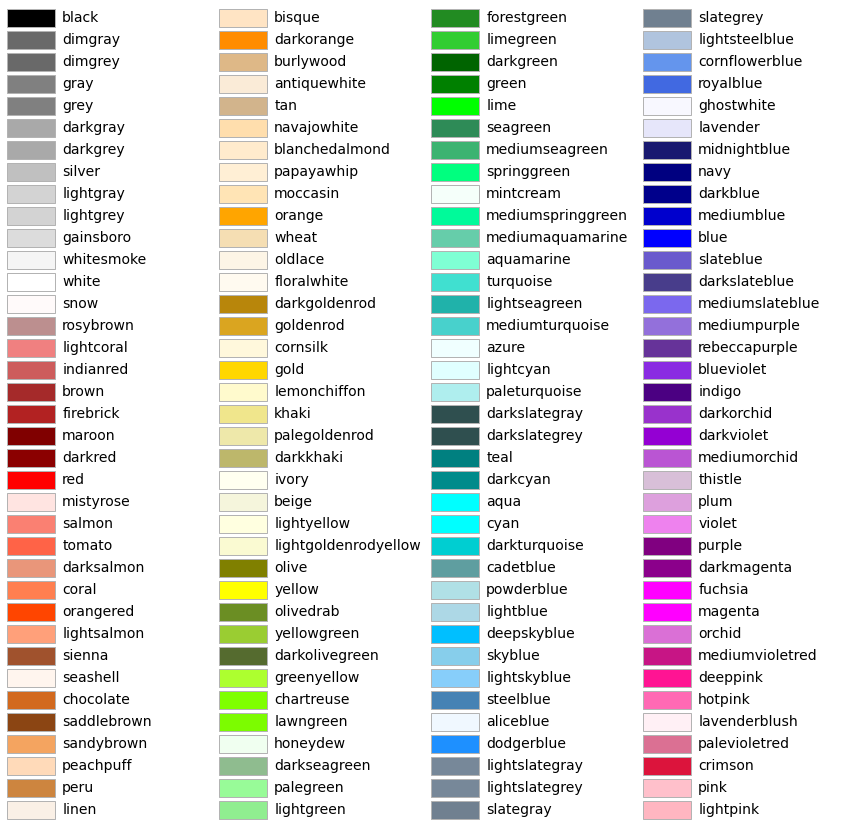

In [23]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

### show variables 

In [16]:
# Define the prefix you want to search for
prefix = 'R'

# Get a list of all variables in the current Jupyter session
all_variables = %who_ls

# Filter variables that start with the specified prefix
filtered_variables = [var for var in all_variables if var.startswith(prefix)]

# Print the filtered variables and their values
for var in filtered_variables:
    print(f"{var}: {globals()[var]}")


R_access_ID_unique: 213250
R_access_rows: 4796816
R_dbscan_rows_uniqueID: 179861
R_flt_by_dbscan_ID_unique: 34411
R_flt_by_dbscan_rows: 675452


### ploting ID and records before & after filtering

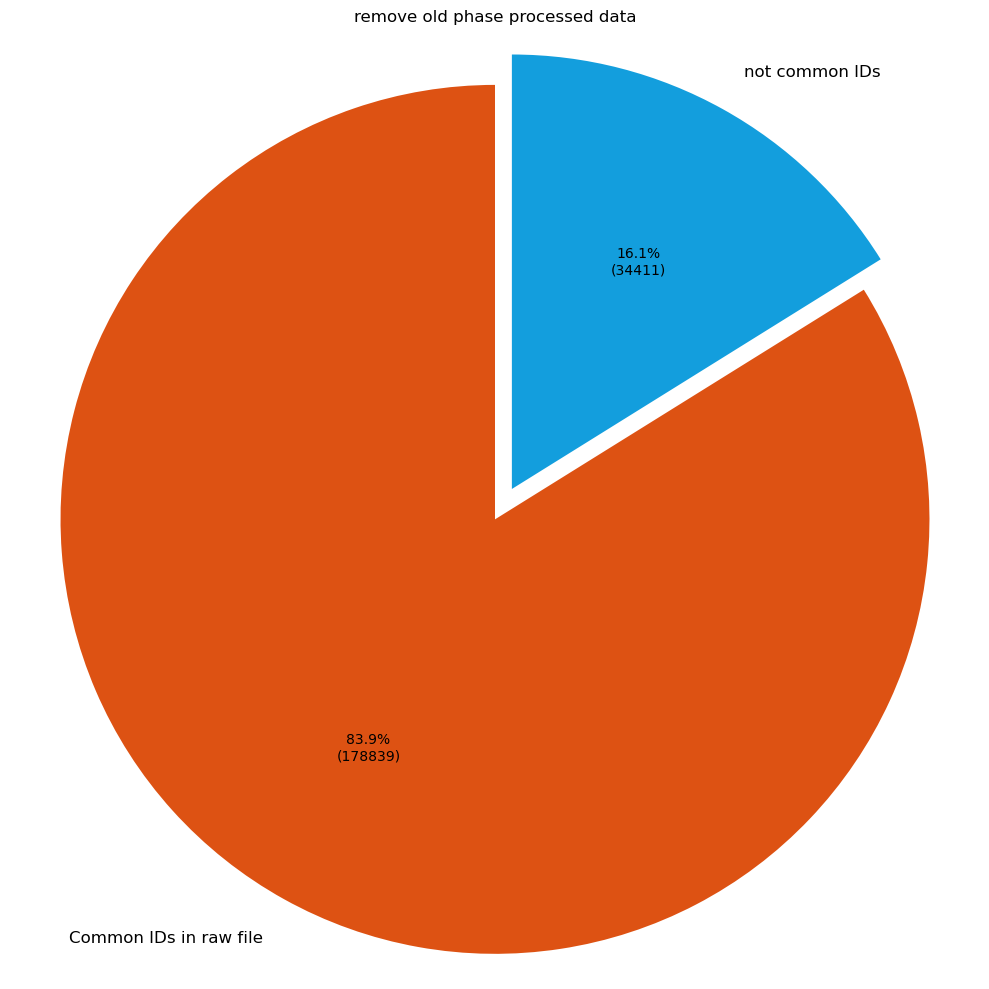

In [47]:

import matplotlib.pyplot as plt

# Data for Pie Chart 2
labels2 = ['Common IDs in raw file', 'not common IDs']
sizes2 = [R_access_ID_unique - R_flt_by_dbscan_ID_unique, R_flt_by_dbscan_ID_unique]
colors2 = ['#DD5213', '#139EDD']  # Orange for before, green for after

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize as needed
explode = (0, 0.08)

# Pie Chart 2
wedges2, texts2, autotexts2 = ax.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90, explode=explode)

# Add value annotations to Pie Chart 2
for text, autotext in zip(texts2, autotexts2):
    autotext.set_fontsize(10)  # Adjust font size of autopct text
    autotext.set_color('black')  # Set color of autopct text to black for better visibility
    text.set_fontsize(12)  # Adjust font size of label text
    text.set_color('black')  # Set color of label text to black
    autotext.set_text(f'{autotext.get_text()}\n({sizes2[texts2.index(text)]})')  # Include numerical value in autopct text

ax.set_title('remove old phase processed data')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.tight_layout()  # Ensures labels don't overlap
plt.savefig('output/حذف_داده_های_فاز_قبل.png')
plt.show()



#######################################PLOT BOTH ID AND RECORDS#################################
# # Data for Pie Chart 1
# labels1 = ['Common ID records in raw file', 'not common ID records']
# sizes1 = [R_access_rows - R_flt_by_dbscan_rows, R_flt_by_dbscan_rows]
# colors1 = ['tomato', 'deepskyblue']  # Red for raw, blue for filtered

# # Data for Pie Chart 2
# labels2 = ['Common IDs in raw file', 'not common IDs']
# sizes2 = [R_access_ID_unique - R_flt_by_dbscan_ID_unique, R_flt_by_dbscan_ID_unique]
# colors2 = ['tomato', 'deepskyblue']  # Orange for before, green for after

# # Plotting
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust figsize as needed
# explode = (0, 0.08)
# # Pie Chart 1
# wedges1, texts1, autotexts1 = axes[0].pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90, explode = explode)

# # Add value annotations to Pie Chart 1
# for text, autotext in zip(texts1, autotexts1):
#     autotext.set_fontsize(10)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# axes[0].set_title('Comparison by unique IDs')

# # Pie Chart 2
# wedges2, texts2, autotexts2 = axes[1].pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90, explode = explode)

# # Add value annotations to Pie Chart 2
# for text, autotext in zip(texts2, autotexts2):
#     autotext.set_fontsize(10)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes2[texts2.index(text)]})')  # Include numerical value in autopct text

# axes[1].set_title('Comparison by Records')

# # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].axis('equal')
# axes[1].axis('equal')

# plt.tight_layout()  # Ensures labels don't overlap
# plt.savefig('output/comparison_ID_record.png')
# plt.show()

### ploting counters statistics 

#### plot counter = True or False by records :

In [43]:
# # R_valid_counters_ID_unique = R_counters_ID_unique - R_counters_outlayer_ID_unique
# # R_not_inverted_counters_ID_unique = R_valid_counters_ID_unique - R_counters_inverted_ID_unique
# # 1 = 'counter cooridantes exsitance within raw dataset'
# # 2 = counters conditions
# # 3 = 'counter cooridantes exsitance within raw dataset'
# # 4 = 'counters conditions'

# # # Data for the pie chart
# # labels1 = ['inverted counters', 'valid counters', 'outlayer or invalid counters']
# # sizes = [R_counters_inverted_ID_unique, R_not_inverted_counters_ID_unique, R_counters_outlayer_ID_unique]
# # colors = ['goldenrod', 'limegreen', 'indianred']
# explode1 = ( 0, 0.1)
# # Plotting the pie chart
# ###############################################################
# # Data for Pie Chart 1
# labels1 = ['records without counter data', 'records with counter data']
# sizes1 = [R_flt_by_dbscan_rows - R_counters, R_counters]
# colors1 = ['tomato', 'deepskyblue']  # Red for raw, blue for filtered


# # Plotting

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust figsize as needed
# explode1 = (0, 0.08)
# # Pie Chart 1
# wedges1, texts1, autotexts1 = axes[0].pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90)

# # Add value annotations to Pie Chart 1
# for text, autotext in zip(texts1, autotexts1):
#     autotext.set_fontsize(10)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# axes[0].set_title('counter cooridantes exsitance within filtered dataset', fontsize=16, fontweight='bold')
# ###############################################################
# explode2 = ( 0,0, 0.1)
#  # Data for Pie Chart 2
# labels2 = ['valid counters','valid but inverted counter', 'outlayer or invalid counters']
# sizes2 = [(R_counters - R_counters_inverted - R_counters_outlayer),R_counters_inverted, R_counters_outlayer]
# colors2 = ['GREEN','teal', 'tomato']  # Orange for before, green for after

# # Pie Chart 2
# wedges2, texts2, autotexts2 = axes[1].pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,)

# # Add value annotations to Pie Chart 2
# for text, autotext in zip(texts2, autotexts2):
#     autotext.set_fontsize(10)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes2[texts2.index(text)]})')  # Include numerical value in autopct text

# axes[1].set_title('exited counters conditions',fontsize=16, fontweight='bold')

# # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].axis('equal')
# axes[1].axis('equal')

# plt.tight_layout()  # Ensures labels don't overlap
# plt.savefig('output/counter_counditions_records.png')
# plt.show()

#### plot counter = True or False by IDs :

In [61]:
# # R_valid_counters_ID_unique = R_counters_ID_unique - R_counters_outlayer_ID_unique
# # R_not_inverted_counters_ID_unique = R_valid_counters_ID_unique - R_counters_inverted_ID_unique


# # # Data for the pie chart
# # labels1 = ['inverted counters', 'valid counters', 'outlayer or invalid counters']
# # sizes = [R_counters_inverted_ID_unique, R_not_inverted_counters_ID_unique, R_counters_outlayer_ID_unique]
# # colors = ['goldenrod', 'limegreen', 'indianred']
# explode1 = ( 0, 0.1)
# # Plotting the pie chart
# ###############################################################
# # Data for Pie Chart 1
# labels1 = ['IDs without counter', 'IDs with counter data']
# sizes1 = [R_flt_by_dbscan_ID_unique - R_counters_ID_unique, R_counters_ID_unique]
# colors1 = ['#DD5213', '#139EDD']  # Red for raw, blue for filtered


# # Plotting

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust figsize as needed
# explode = (0, 0.08)
# # Pie Chart 1
# wedges1, texts1, autotexts1 = axes[0].pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90, explode = explode1)

# # Add value annotations to Pie Chart 1
# for text, autotext in zip(texts1, autotexts1):
#     autotext.set_fontsize(10)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# axes[0].set_title('2', fontsize=16, fontweight='bold')
# ###############################################################
# explode2 = ( 0,0, 0.1)
#  # Data for Pie Chart 2
# labels2 = ['valid counters','valid but inverted counter', 'outlayer or invalid counters']
# sizes2 = [(R_counters_ID_unique - R_counters_inverted_ID_unique - R_counters_outlayer_ID_unique) ,R_counters_inverted_ID_unique, R_counters_outlayer_ID_unique]
# colors2 = ['green','teal', 'tomato']  # Orange for before, green for after

# # Pie Chart 2
# wedges2, texts2, autotexts2 = axes[1].pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90, explode = explode2)

# # Add value annotations to Pie Chart 2
# for text, autotext in zip(texts2, autotexts2):
#     autotext.set_fontsize(10)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes2[texts2.index(text)]})')  # Include numerical value in autopct text

# axes[1].set_title('4',fontsize=16, fontweight='bold')

# # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].axis('equal')
# axes[1].axis('equal')

# plt.tight_layout()  # Ensures labels don't overlap
# plt.savefig('output/counter_counditions_ID.png')
# plt.show()

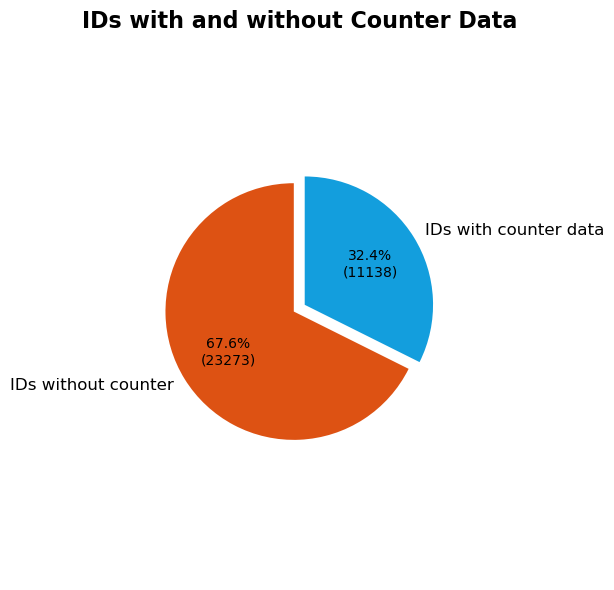

In [60]:
import matplotlib.pyplot as plt

# Data for Pie Chart 1
labels1 = ['IDs without counter', 'IDs with counter data']
sizes1 = [R_flt_by_dbscan_ID_unique - R_counters_ID_unique, R_counters_ID_unique]
colors1 = ['#DD5213', '#139EDD']  # Red for raw, blue for filtered
explode1 = (0, 0.1)

# Plotting Pie Chart 1
fig1, ax1 = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed
wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90, explode=explode1)

# Add value annotations to Pie Chart 1
for text, autotext in zip(texts1, autotexts1):
    autotext.set_fontsize(10)  # Adjust font size of autopct text
    autotext.set_color('black')  # Set color of autopct text to white for better visibility
    text.set_fontsize(12)  # Adjust font size of label text
    text.set_color('black')  # Set color of label text to black
    autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

ax1.set_title('IDs with and without Counter Data', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.tight_layout()  # Ensures labels don't overlap
plt.savefig('output/وضعیت_وجود_مختصات_کنتور_مشترکین.png')
plt.show()


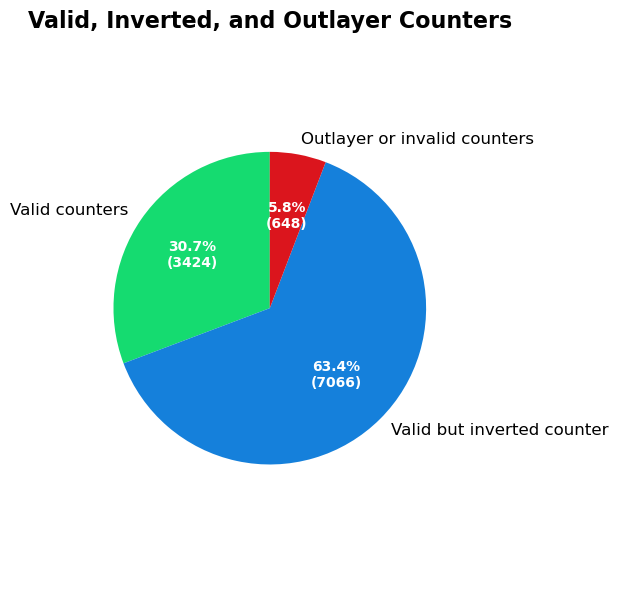

In [71]:
import matplotlib.pyplot as plt

# Data for Pie Chart 2
labels2 = ['Valid counters', 'Valid but inverted counter', 'Outlayer or invalid counters']
sizes2 = [(R_counters_ID_unique - R_counters_inverted_ID_unique - R_counters_outlayer_ID_unique), R_counters_inverted_ID_unique, R_counters_outlayer_ID_unique]
colors2 = ['#15DB70', '#1580DB', '#DB151D']  # Green for valid, teal for inverted, tomato for outlayer
#explode2 = (0, 0, 0.1)

# Plotting Pie Chart 2
fig2, ax2 = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed
wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90) #, explode=explode2)

# Add value annotations to Pie Chart 2
for text, autotext in zip(texts2, autotexts2):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')# Adjust font size of autopct text
    autotext.set_color('white')  # Set color of autopct text to white for better visibility
    text.set_fontsize(12)  # Adjust font size of label text
    text.set_color('black')  # Set color of label text to black
    autotext.set_text(f'{autotext.get_text()}\n({sizes2[texts2.index(text)]})')  # Include numerical value in autopct text

ax2.set_title('Valid, Inverted, and Outlayer Counters', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')

plt.tight_layout()  # Ensures labels don't overlap
plt.savefig('output/وضعیت_مختصات_کنتورها.png')
plt.show()


##### plot 4 in a row ! 

### before DBSCAN ploting

In [98]:
# import matplotlib.pyplot as plt

# # Example data (replace with your actual data)


# # Data for Pie Chart 1
# labels1 = ['other IDs', 'best accuracy IDs', 'located as counter coor.']
# sizes1 = [R_flt_by_dbscan_ID_unique - (R_1_best_accuracy_ID_unique + R_2_counter_as_coor), R_1_best_accuracy_ID_unique, R_2_counter_as_coor]
# colors1 = ['#B1484B', '#B1484B','#B1484B']  # Red for raw, blue for filtered

# # Plotting
# fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed
# explode = (0, 0.08, 0.08)

# # Pie Chart 1
# wedges1, texts1, autotexts1 = ax.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=60, explode=explode)

# # Add value annotations to Pie Chart 1
# for text, autotext in zip(texts1, autotexts1):
#     autotext.set_fontsize(8)  # Adjust font size of autopct text
#     autotext.set_color('black')  # Set color of autopct text to white for better visibility
#     text.set_fontsize(12)  # Adjust font size of label text
#     text.set_color('black')  # Set color of label text to black
#     autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# ax.set_title('before DBSCAN', fontsize = 14)

# # Equal aspect ratio ensures that pie is drawn as a circle.
# ax.axis('equal')

# plt.tight_layout() 
# plt.savefig('my_combined_pie_charts.png')
# # Ensures labels don't overlap
# plt.show()


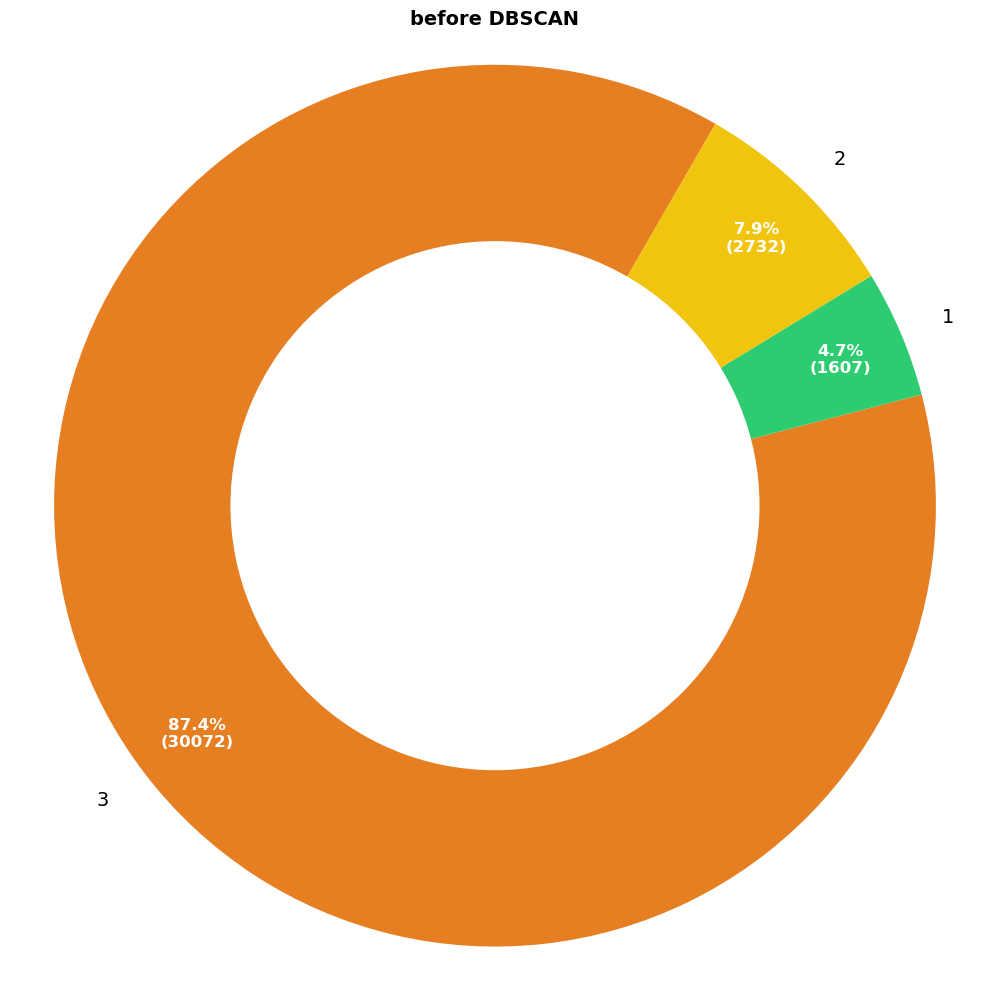

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
counter_cor = pd.read_csv('counter_true/filtered_data_counter_as_cooridate.csv')
R_2_counter_as_coor = (counter_cor.shape[0])
# Data for Pie Chart
labels1 = ['3', '1', '2']
#labels1 = ['Other IDs', 'Best Accuracy IDs', 'Located as Counter Coor.']
sizes1 = [R_flt_by_dbscan_ID_unique - (R_1_best_accuracy_ID_unique + R_2_counter_as_coor), R_1_best_accuracy_ID_unique, R_2_counter_as_coor]
colors1 = ['#e67e22', '#2ecc71', '#f1c40f']

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
#explode = (0, 0.1, 0.1)

# Pie Chart
wedges1, texts1, autotexts1 = ax.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=60,  pctdistance=0.85) #,explode=explode)

# Add value annotations to Pie Chart
for text, autotext in zip(texts1, autotexts1):
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')# Adjust font size of autopct text
    autotext.set_color('white')  # Set color of autopct text to white for better visibility
    text.set_fontsize(14)  # Adjust font size of label text
    text.set_color('black')  # Set color of label text to black
    autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# Draw circle for donut chart effect
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)

# Title and styling
ax.set_title('before DBSCAN', fontsize=14, fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Ensures labels don't overlap
plt.savefig('output/قبل_از_کلاسترینگ.png')
plt.show()


In [100]:
### After DBSCAN

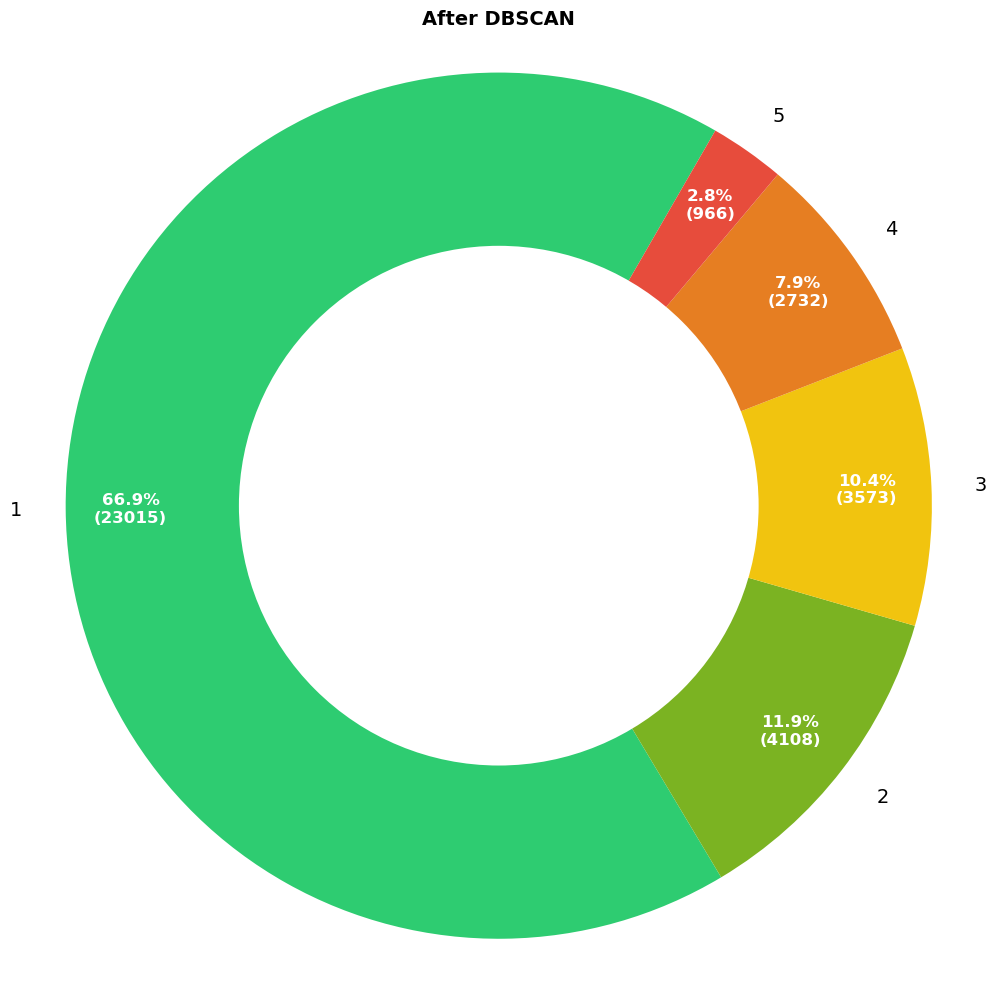

In [73]:
P_gheteE = pd.read_csv('output/دقت_قطعه_ای.csv')
P_bluki =pd.read_csv('output/دقت_بلوکی.csv')
P_mantagheE = pd.read_csv('output/دقت_منطقه_ای.csv')
P_counter = pd.read_csv('output/مختصات_کنتور_به_عنوان_مکان_مشترکین.csv')
P_bad_IDs = pd.read_csv('output/مشترکین_با_داده_ناکافی.csv')
#####
R_gheteE = (P_gheteE.shape[0]) 
R_bluki = (P_bluki.shape[0])
R_mantageE = (P_mantagheE.shape[0])
R_counter = (P_counter.shape[0])
R_bad_IDs = (P_bad_IDs.shape[0])
# Data for Pie Chart
labels1 = ['1','2','3','4','5']
sizes1 = [R_gheteE ,R_bluki,R_mantageE, R_counter, R_bad_IDs ]
colors1 = ['#2ecc71','#7BB322', '#f1c40f', '#e67e22', '#e74c3c']

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
#explode = (0, 0.1, 0.1)

# Pie Chart
wedges1, texts1, autotexts1 = ax.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=60, pctdistance=0.85)

# Add value annotations to Pie Chart
for text, autotext in zip(texts1, autotexts1):
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')# Adjust font size of autopct text
    autotext.set_color('white')  # Set color of autopct text to white for better visibility
    text.set_fontsize(14)  # Adjust font size of label text
    text.set_color('black')  # Set color of label text to black
    autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# Draw circle for donut chart effect
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)

# Title and styling
ax.set_title('After DBSCAN', fontsize=14, fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Ensures labels don't overlap
plt.savefig('output/دقت_بعد_از_DBSCAN.png')
plt.show()


In [27]:
sizes1 = R_gheteE + R_bluki + R_mantageE + R_counter + R_bad_IDs 
sizes1

34394

In [94]:

R_flt_by_dbscan_ID_unique

213250

## VII - test DBF file

In [76]:
df = gpd.read_file('دقت_بلوکی.dbf')[["BILL_IDENT"]]
df2 = gpd.read_file('دقت_منطقه_ای.dbf')[["BILL_IDENT"]]
old_not_good_IDs_df = pd.concat([df, df2], ignore_index=True)
new_good_IDs = gpd.read_file('output/دقت_قطعه_ای.csv')[["ID"]]

In [77]:
new_good_IDs

,ID
0,8001350104220
1,8001379804220
2,8001408004220
3,8001410004220
4,8001410304223
...,...
23010,8766198604226
23011,8766198704220
23012,8766198804225
23013,8766457004224


In [81]:
first_col_df1 = old_not_good_IDs_df.iloc[:, 0]
first_col_df2 =new_good_IDs.iloc[:, 0]

# Find the intersection of the two sets of numbers
identical_numbers = set(first_col_df1).intersection(set(first_col_df2))
# Count the number of identical numbers
num_identical = len(identical_numbers)
R_old_not_good_IDs = (old_not_good_IDs_df.shape[0])
R_new_good_IDs = (new_good_IDs.shape[0])
print(f"Number of not good accuracy IDs in old phase: {R_old_not_good_IDs}")
print(f"Number of  good accuracy IDs in this phase: {R_new_good_IDs}")
print(f"Number of identical numbers in the first column of both dataframes: {num_identical}")


Number of not good accuracy IDs in old phase: 26315
Number of  good accuracy IDs in this phase: 23015
Number of identical numbers in the first column of both dataframes: 19545


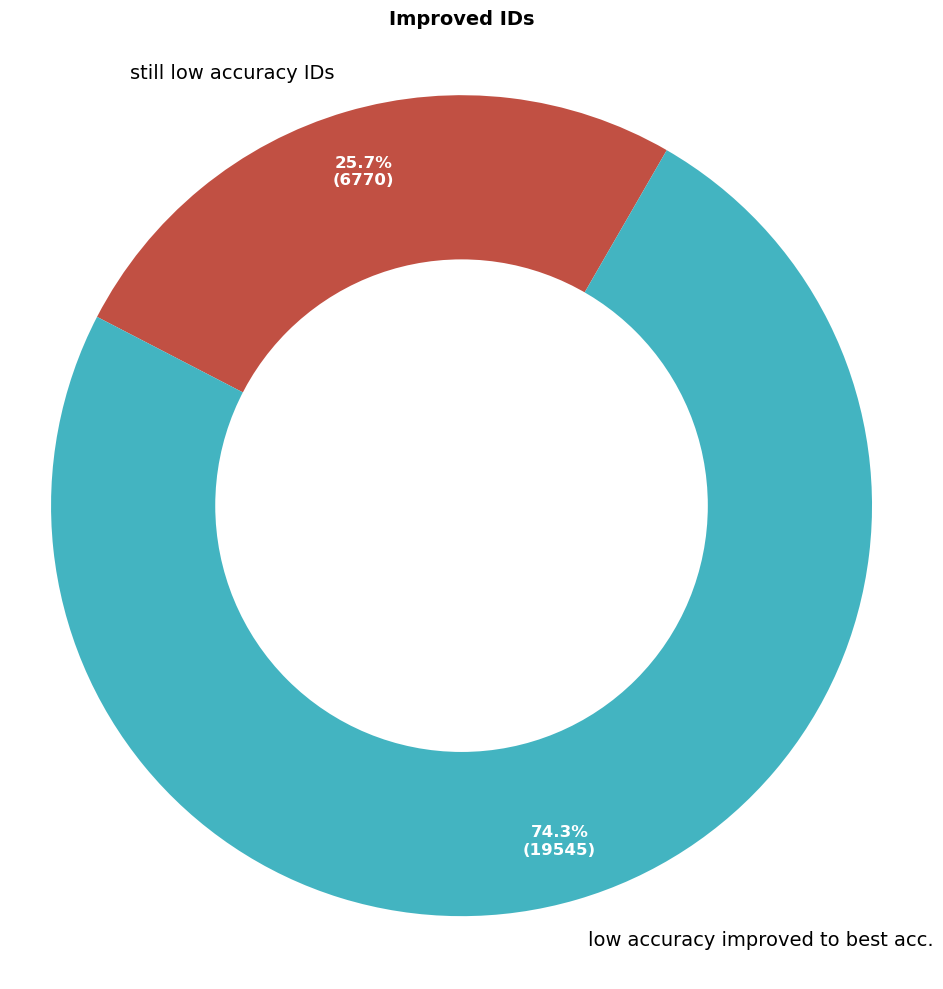

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Pie Chart
labels1 = ['still low accuracy IDs', 'low accuracy improved to best acc.',]
sizes1 = [R_old_not_good_IDs - num_identical, num_identical]
colors1 = ['#C15043','#43B4C1']

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
#explode = (0, 0.1)

# Pie Chart
wedges1, texts1, autotexts1 = ax.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=60, pctdistance=0.85)

# Add value annotations to Pie Chart
for text, autotext in zip(texts1, autotexts1):
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')# Adjust font size of autopct text
    autotext.set_color('white')  # Set color of autopct text to white for better visibility
    text.set_fontsize(14)  # Adjust font size of label text
    text.set_color('black')  # Set color of label text to black
    autotext.set_text(f'{autotext.get_text()}\n({sizes1[texts1.index(text)]})')  # Include numerical value in autopct text

# Draw circle for donut chart effect
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)

# Title and styling
ax.set_title('Improved IDs', fontsize=14, fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Ensures labels don't overlap
plt.savefig('output/مشترکین_بهبود_یافته.png')
plt.show()


In [83]:
identical_numbers_list = list(identical_numbers)

# Create a DataFrame from the list
df_identical_numbers = pd.DataFrame(identical_numbers_list, columns=["Identical Numbers"])

# Save the DataFrame to a CSV file
df_identical_numbers.to_csv('output/مشترکین_با_دقت_بهبود_یافته_در_فاز_جدید.csv', index=False)

print("The identical numbers have been saved to 'مشترکین_با_دقت_بهبود_یافته_در_فاز_جدید.csv'")

The identical numbers have been saved to 'مشترکین_با_دقت_بهبود_یافته_در_فاز_جدید.csv'
